## Import Some Libraries

In [2]:
import os.path 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from statistics import pstdev
from scipy.fft import fftshift, ifft, fftfreq
import numpy as np
from scipy.signal.windows import tukey
import math
from scipy.interpolate import interp1d
from time import time as time
from time import strftime
from datetime import date
from scipy.signal import ShortTimeFFT
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm
from IPython.display import display, Latex
import re 
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import hilbert
from matplotlib.patches import Rectangle

import lmfit

from scipy.signal.windows import tukey

plt.rcParams.update({'font.size':10})

# Phase Mask Generator

This file takes a generated phase mask from the Phase_amp_gen_scan software (_Pmask.txt), loads it, summs it to the most up to date transform limited compensation mask. Finally it saves the resultant summation as a text file of the correct form (tab delimited two column text file with no header). This file can then be loaded as a compensatiton mask in the FROG/autocorrelation section of the software. There then exists FRROG_temp_recovery.ipynb to recover the temporal width of the resultant output of the SHG autocorrelation. 

Note the phase mask file must end '_GDD_GDD-value_Pmasks.txt' - where GDD value is the GDD value typed into the software when the file was created.

## Define the Functions

In [20]:
def phase_mask_creation(generated_phase_file,TL_compensation_file,save_folder, plot = None):
    
    loaded_phase_file = np.loadtxt(generated_phase_file, skiprows =9)

    phase_wave = loaded_phase_file[:,0]
    phase_amp = loaded_phase_file[:,1]

    comp_data_load = np.loadtxt(TL_compensation_file)
    comp_wave = comp_data_load[:,0]
    comp_amp = comp_data_load[:,1]

    phase_summation = comp_amp + phase_amp

    if plot == True: 
    
        plt.figure(figsize=(15,8))
        
        plt.plot(phase_wave,phase_amp, color ='blue', label ='Generated Mask') 
        plt.plot(comp_wave,comp_amp, color ='red', label ='Compansation Mask') 
        plt.plot(comp_wave,phase_summation, color ='magenta', label ='Resultant Summation Mask') 
        
        plt.xlabel("Wavelength (nm)")
        plt.ylabel(" Intensity (Arb. Units)")
        plt.title("Summary of Phase Mask Form")
        plt.legend()
        

        plt.show()

    f = generated_phase_file.split('/')[-1]
    GDD = str(f.split('_')[-2])
    title = ''+GDD+'_GDD_TL_summed_mask_'+(date.today()).strftime("_%d_%m_%y")+'.txt'
    save_name =os.path.join(save_folder,title)

    np.savetxt(save_name, np.c_[comp_wave, phase_summation],delimiter='\t')



def phase_mask_creation_folder(generated_phase_file_folder, TL_compensation_file, save_folder, plot = None):

    comp_data_load = np.loadtxt(TL_compensation_file)
    comp_wave = comp_data_load[:,0]
    comp_amp = comp_data_load[:,1]

    load_folder = os.listdir(generated_phase_file_folder)

    for x in range(len(load_folder)):

        file_path = os.path.join(generated_phase_file_folder, load_folder[x])
        print('I am computing file',load_folder[x])

        loaded_phase_file = np.loadtxt(file_path, skiprows =9)

        phase_wave = loaded_phase_file[:,0]
        phase_amp = loaded_phase_file[:,1]

        phase_summation = comp_amp + phase_amp

        GDD = str(load_folder[x].split('_')[-2])
        title = ''+GDD+'_GDD_TL_summed_mask_'+(date.today()).strftime("_%d_%m_%y")+'.txt'

        if plot == True: 

            plt.figure(figsize=(15,8))
        
            plt.plot(phase_wave,phase_amp, color ='blue', label ='Generated Mask') 
            plt.plot(comp_wave,comp_amp, color ='red', label ='Compansation Mask') 
            plt.plot(comp_wave,phase_summation, color ='magenta', label ='Resultant Summation Mask') 
            plt.xlabel("Wavelength (nm)")
            plt.ylabel(" Intensity (Arb. Units)")
            plt.title(title)
            plt.legend()
            plt.show()

        
        save_name =os.path.join(save_folder,title)

        np.savetxt(save_name, np.c_[comp_wave, phase_summation],delimiter='\t')

## Define the Files and the Variables for Single File

In [14]:
phase_file_700 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/211125/251125_phase_mask_GDD_700_Pmasks.txt'
comp_file = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/201125 Attempt/comp_112025_150348_i17.txt'
save_folder = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/Results/Summed Phase Masks/'
Plot = True





## Run the Single File Function

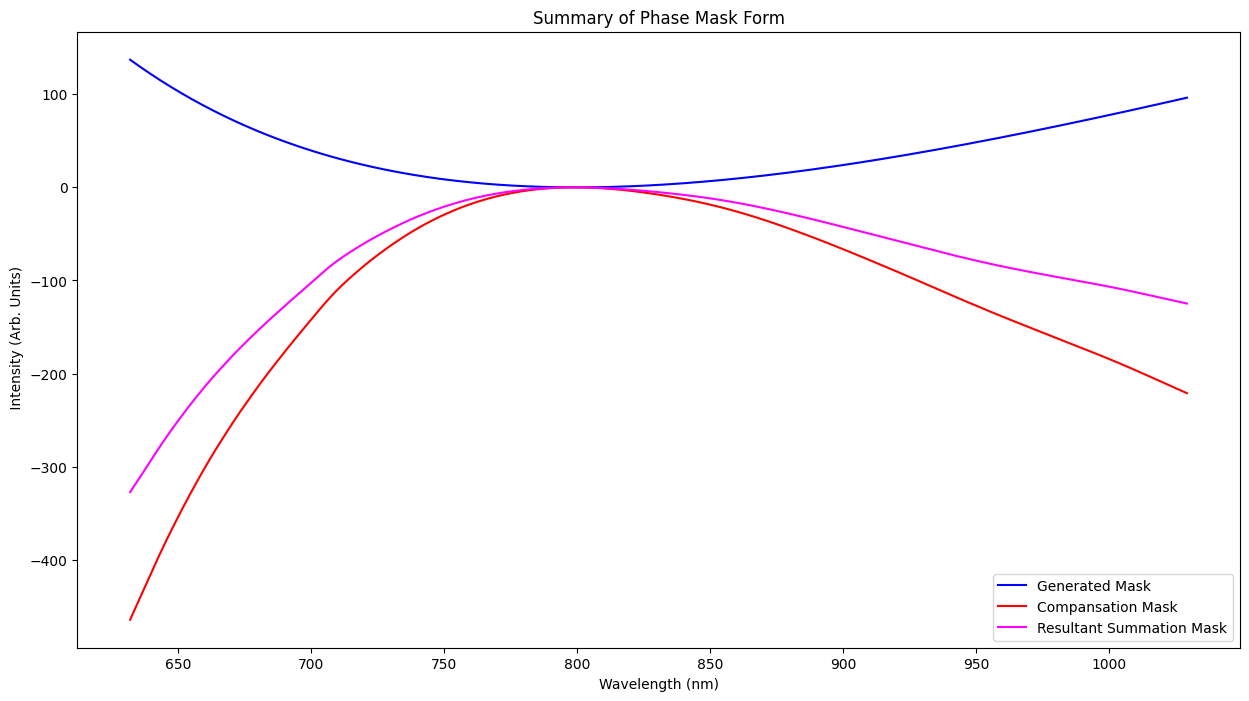

In [15]:
phase_mask_creation(phase_file_700,comp_file, save_folder, plot = Plot)

## Define the Folders, Files and Variables for the Folder Function 

In [18]:
folder_attempt = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/Software Generated Pmasks'
comp_file = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/201125 Attempt/comp_112025_150348_i17.txt'
save_folder = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/Results/Summed Phase Masks/'
Plot = True



## Run the Folder Function 

I am computing file 211125_phase_mask_pred_330_Pmasks.txt


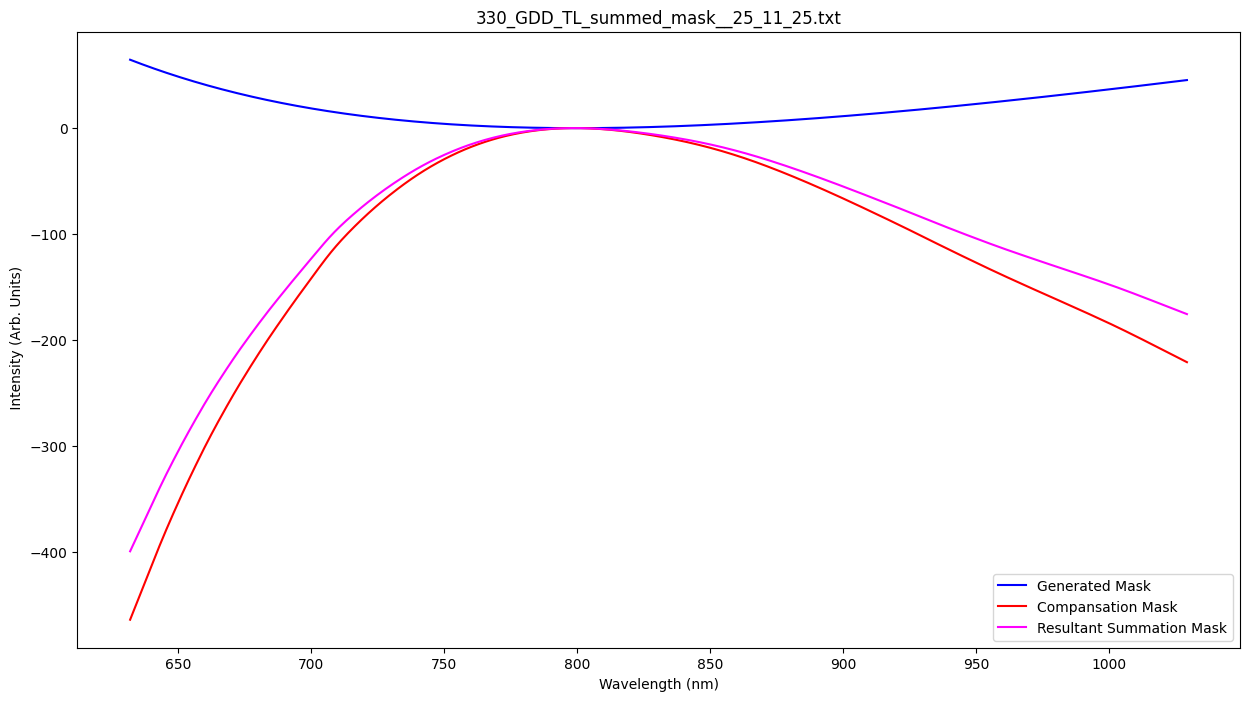

I am computing file 211125_phase_mask_pred_3321_Pmasks.txt


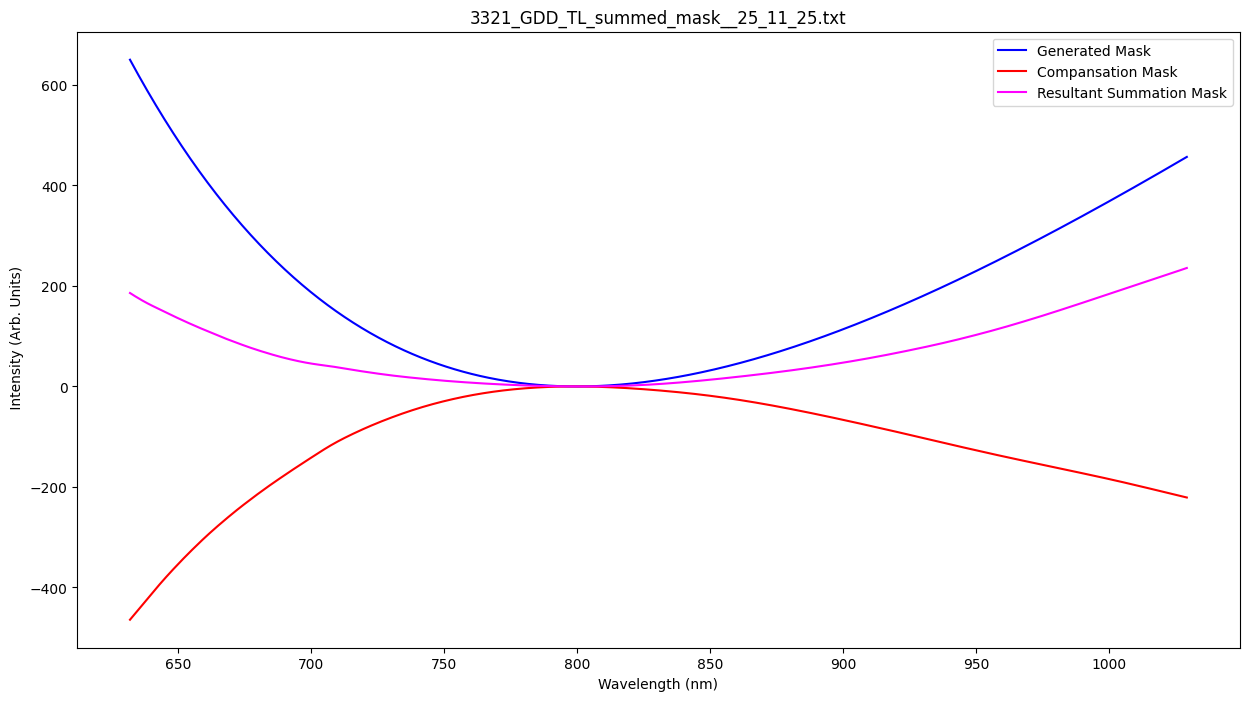

I am computing file 251125_phase_mask_GDD_700_Pmasks.txt


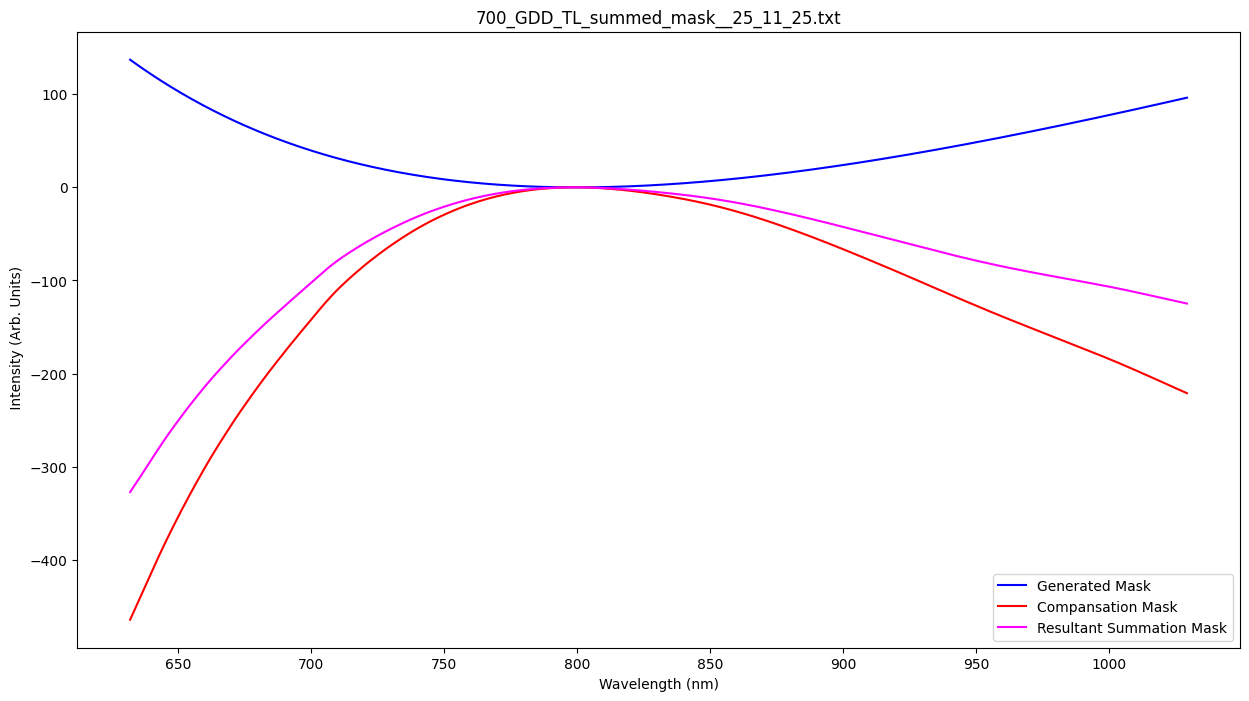

I am computing file 211125_phase_mask_pred_4484_Pmasks.txt


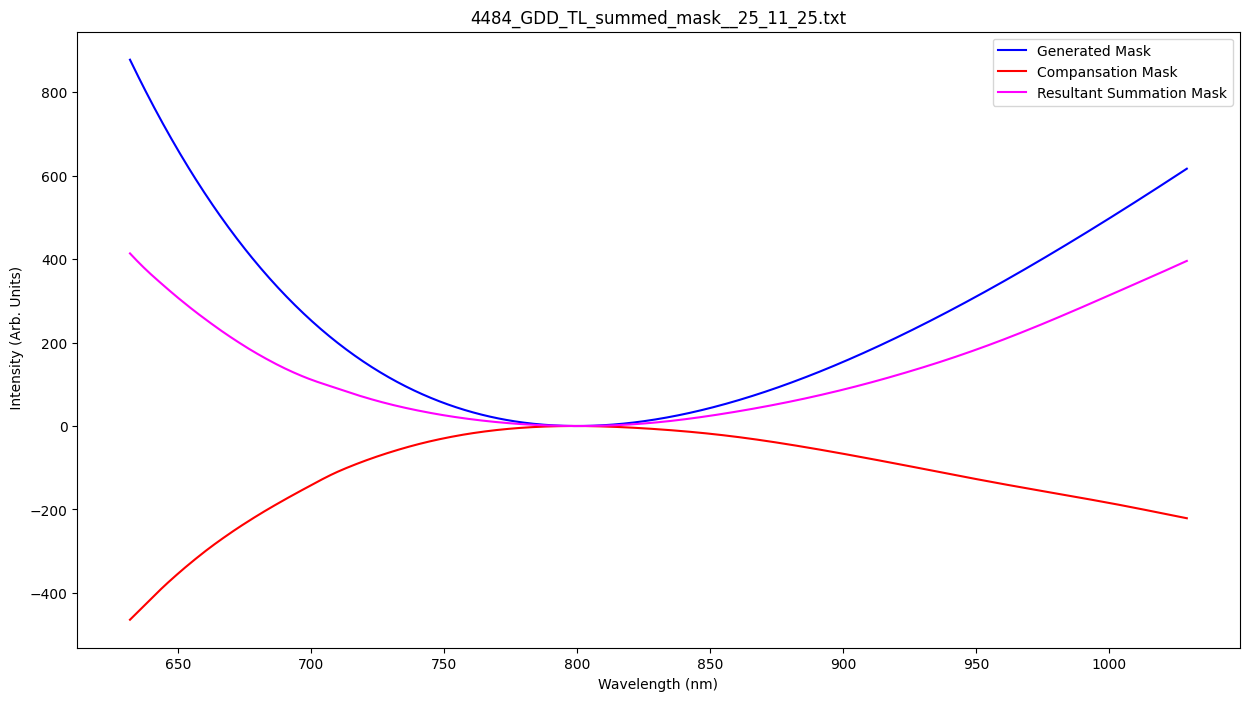

In [21]:
phase_mask_creation_folder(folder_attempt, comp_file, save_folder, plot = Plot)